# Regression Model

Since the target variable `target_xg` is continuous in the range [0, 1], the problem is a **regression task**.  
We begin with a **Linear Regression** model to establish a baseline, evaluating results with:

- **Mean Absolute Error (MAE)**  
- **Root Mean Squared Error (RMSE)**  
- **R² score**  

This baseline provides a first benchmark. It is possible also to try more advanced models – such as **Ridge, Lasso, and Tree-based regressors** – to improve predictive performance and better capture non-linear relationships in the data. 

## Dataset: DS0

### DS0 - Random Forest Regressor

In [36]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load dataset DS0
ds0 = pd.read_csv("../task1_xg/data/DS0.csv")

# Columns to drop (IDs and target)
columns_to_drop = [
    "event_id", "match_id", "team_id", 
    "player_id", "possession_team_id", "target_xg"
]

# Features (X) and Target (y)
X_ds0 = ds0.drop(columns=columns_to_drop)
y_ds0 = ds0["target_xg"]

print("Dataset DS0 loaded successfully")
print(f"Shape: {ds0.shape}")
print(f"Training Features: {X_ds0.shape[1]}")


Dataset DS0 loaded successfully
Shape: (88023, 45)
Training Features: 39


In [37]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    make_scorer
)
from sklearn.ensemble import RandomForestRegressor

# Train/Test Split (80/20) for DS0
X_train_ds0, X_test_ds0, y_train_ds0, y_test_ds0 = train_test_split(
    X_ds0, y_ds0, test_size=0.2, random_state=42
)

print(f"Training set size DS0: {X_train_ds0.shape}, Test set size DS0: {X_test_ds0.shape}")

# Hyperparameter Grid for Random Forest
param_grid_ds0 = {
    "n_estimators": [250, 500, 1000],
    "max_depth": [30, 40, 50],
    "max_features": ["sqrt", "log2"]
}

# Define scorer (negative RMSE, since sklearn maximizes)
rmse_scorer_ds0 = make_scorer(
    lambda yt, yp: -np.sqrt(mean_squared_error(yt, yp))
)

# GridSearchCV with 5-fold cross-validation
grid_search_ds0 = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid_ds0,
    cv=5,
    scoring=rmse_scorer_ds0,
    n_jobs=-1,
    verbose=1,
    refit=True
)

# Fit GridSearch
grid_search_ds0.fit(X_train_ds0, y_train_ds0)

print("Grid search completed for DS0")
print("Best Parameters:", grid_search_ds0.best_params_)


Training set size DS0: (70418, 39), Test set size DS0: (17605, 39)
Fitting 5 folds for each of 18 candidates, totalling 90 fits


KeyboardInterrupt: 

In [ ]:
# Complete results of cross-validation
df_results_ds0 = pd.DataFrame(grid_search_ds0.cv_results_)

# Show the most important columns
results_table_ds0 = df_results_ds0[[
    "param_n_estimators", "param_max_depth", "param_max_features",
    "mean_test_score", "std_test_score", "rank_test_score"
]].copy()

# Convert RMSE from negative to positive
results_table_ds0["mean_test_RMSE"] = -results_table_ds0["mean_test_score"]
results_table_ds0["std_test_RMSE"] = results_table_ds0["std_test_score"]

# Drop old columns and sort by rank
results_table_ds0 = results_table_ds0.drop(columns=["mean_test_score", "std_test_score"])
results_table_ds0 = results_table_ds0.sort_values("rank_test_score")

print("GridSearchCV results for DS0 (best combinations on top):")
display(results_table_ds0)

print("\nBest parameters from CV (DS0):")
print(grid_search_ds0.best_params_)
print(f"Best CV RMSE (DS0): {-grid_search_ds0.best_score_:.6f}")


GridSearchCV results for DS0 (best combinations on top):


,param_n_estimators,param_max_depth,param_max_features,rank_test_score,mean_test_RMSE,std_test_RMSE
8,1000,40,sqrt,1,0.06503920,0.00171600
7,500,40,sqrt,2,0.06504034,0.00174329
14,1000,50,sqrt,3,0.06506376,0.00170725
13,500,50,sqrt,4,0.06506748,0.00167167
1,500,30,sqrt,5,0.06509444,0.00169267
2,1000,30,sqrt,6,0.06510105,0.00166967
6,250,40,sqrt,7,0.06511917,0.00173542
12,250,50,sqrt,8,0.06513133,0.00168578
0,250,30,sqrt,9,0.06513972,0.00168479
17,1000,50,log2,10,0.06650454,0.00174682



Best parameters from CV (DS0):
{'max_depth': 40, 'max_features': 'sqrt', 'n_estimators': 1000}
Best CV RMSE (DS0): 0.065039


In [ ]:
# Test set Evaluation (DS0)
best_model_ds0 = grid_search_ds0.best_estimator_
y_pred_ds0 = best_model_ds0.predict(X_test_ds0)

# Metrics

# RMSE (Root Mean Squared Error)
# - Measures the average magnitude of the errors between predicted and actual values
# - Formula: RMSE = sqrt(mean_squared_error(y_true, y_pred))
# - The lower the RMSE, the better the model's performance
rmse_test = np.sqrt(mean_squared_error(y_test_ds0, y_pred_ds0))

# MAE (Mean Absolute Error)
# - Measures the average magnitude of the errors between predicted and actual values
# - Formula: MAE = mean_absolute_error(y_true, y_pred)
# - The lower the MAE, the better the model's performance
mae_test = mean_absolute_error(y_test_ds0, y_pred_ds0)

# R² (Coefficient of Determination)
# - Measures the proportion of the variance in the dependent variable that is predictable from the independent variables
# - Formula: R² = 1 - (SS_res / SS_tot)
#   where SS_res is the sum of squares of residuals and SS_tot is the total sum of squares
# - The higher the R², the better the model's performance
r2_test = r2_score(y_test_ds0, y_pred_ds0)

# Adjusted R² 
# - Adjusts R² to account for the number of predictors in the model
# - Formula: Adjusted R² = 1 - (1 - R²) * (n - 1) / (n - p - 1)
# - The higher the Adjusted R², the better the model's performance
n_ds0 = len(y_test_ds0)
p_ds0 = X_test_ds0.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n_ds0 - 1) / (n_ds0 - p_ds0 - 1)

# Create a DataFrame to display the metrics
metrics_df_ds0 = pd.DataFrame({
    "Metric": ["RMSE", "MAE", "R²", "Adjusted R²"],
    "Value": [rmse_test, mae_test, r2_test, adjusted_r2_test]
}).round(6)

print("Final Test Set Results (DS0):")
display(metrics_df_ds0)


Final Test Set Results (DS0):


,Metric,Value
0,RMSE,0.06420100
1,MAE,0.03302000
2,R²,0.81921300
3,Adjusted R²,0.81881200



 Feature Importance Ranking:
                     Feature  Importance
                       loc_x  0.24167677
                       loc_y  0.13703090
           shot_type_Penalty  0.12141073
          play_pattern_Other  0.10105098
                  end_shot_y  0.06828712
                  end_shot_x  0.04832255
                      minute  0.04790740
                      second  0.03734574
             shot_one_on_one  0.03164143
         shot_type_Open_Play  0.02647181
             shot_first_time  0.02017324
                    period_5  0.01633216
         shot_body_part_Head  0.01295447
              under_pressure  0.01021986
 play_pattern_From_Free_Kick  0.00908074
       shot_technique_Normal  0.00851199
   shot_body_part_Right_Foot  0.00672640
    play_pattern_From_Corner  0.00578185
         shot_type_Free_Kick  0.00568074
    shot_body_part_Left_Foot  0.00537180
   play_pattern_From_Counter  0.00492887
   play_pattern_Regular_Play  0.00477705
  play_pattern_From_Throw_I

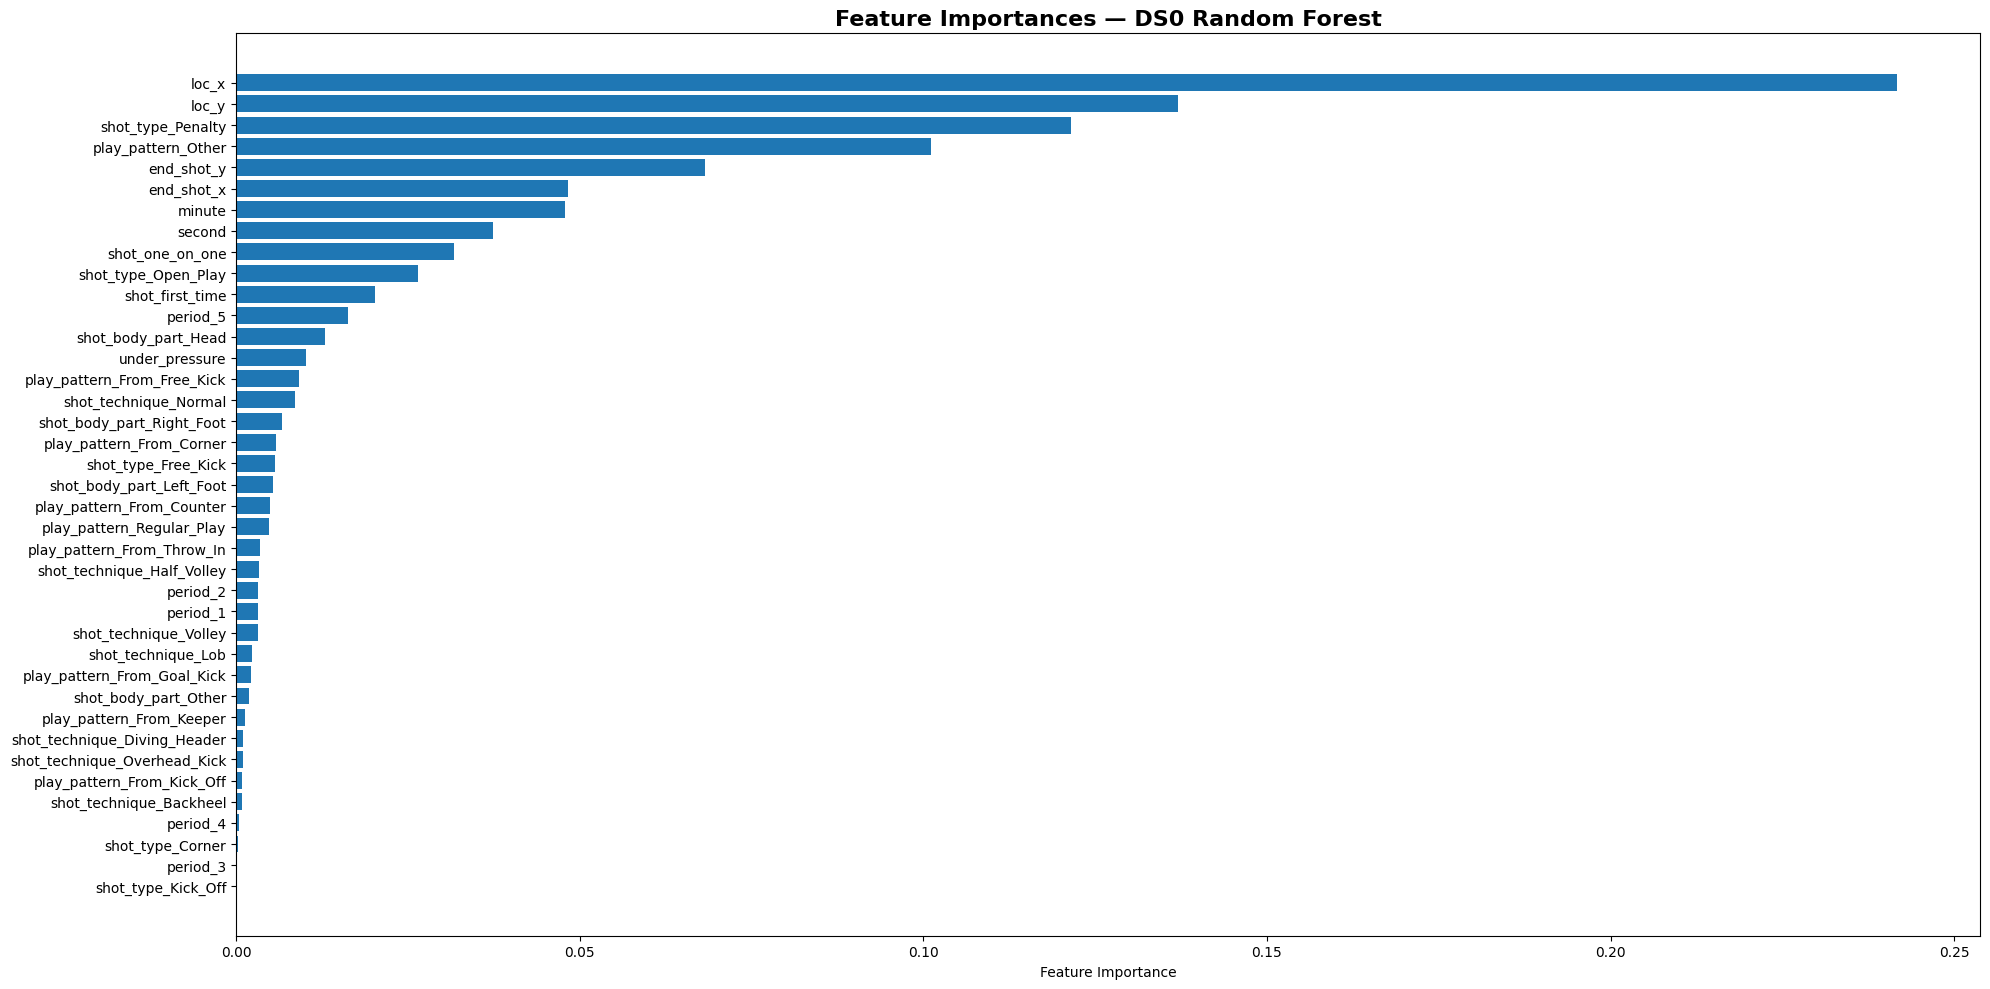

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Feature importances
importances = best_model_ds0.feature_importances_
features = X_ds0.columns
indices = np.argsort(importances)[::-1]

# Ranking
ranking = pd.DataFrame({
    "Feature": features[indices],
    "Importance": importances[indices]
})
print("\n Feature Importance Ranking:")
print(ranking.to_string(index=False))

# Plot of Feature Importances
plt.figure(figsize=(20, 10))
plt.barh(range(len(indices)), importances[indices][::-1], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices][::-1])
plt.xlabel("Feature Importance")
plt.title("Feature Importances — DS0 Random Forest", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


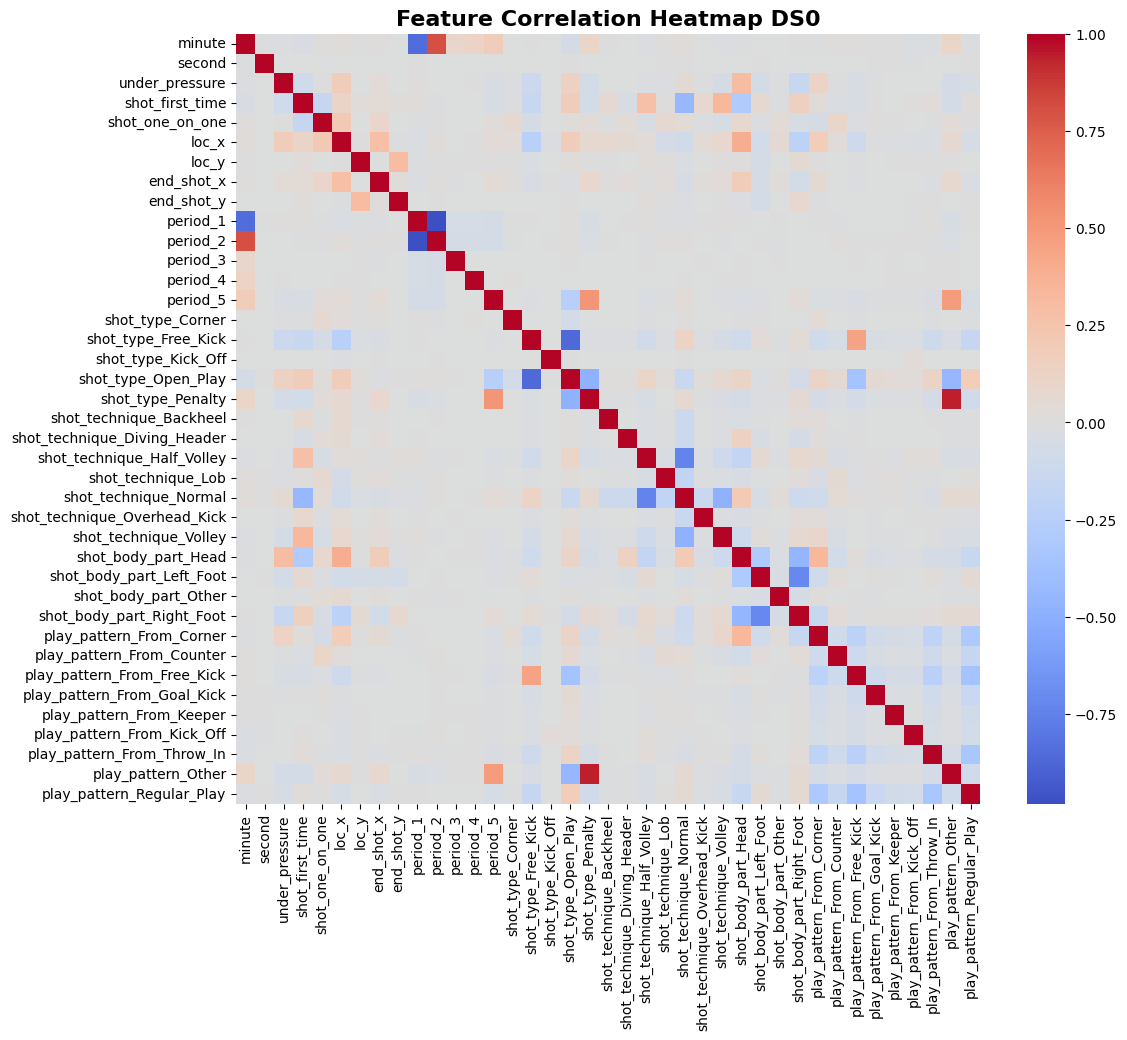

Strong correlations (>|0.25|):
play_pattern_Other           shot_type_Penalty     0.94349144
period_2                     minute                0.80158078
shot_type_Penalty            period_5              0.51349695
play_pattern_Other           period_5              0.48447998
play_pattern_From_Free_Kick  shot_type_Free_Kick   0.44292630
shot_body_part_Head          loc_x                 0.39150466
shot_technique_Volley        shot_first_time       0.33366921
play_pattern_From_Corner     shot_body_part_Head   0.32806232
loc_y                        end_shot_y            0.30833072
under_pressure               shot_body_part_Head   0.29863433
end_shot_x                   loc_x                 0.28438964
shot_technique_Half_Volley   shot_first_time       0.27738369
dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is your DataFrame with the features
corr_matrix = X_ds0.corr()

# Correlation Heatmap 
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, cbar=True)
plt.title("Feature Correlation Heatmap DS0", fontsize=16, fontweight='bold')
plt.show()

# Take absolute values of correlations
corr_pairs = (
    corr_matrix
    .unstack() # flatten matrix
    .sort_values(ascending=False) # sort from strongest to weakest
)

# Remove duplicates and diagonal
corr_pairs = corr_pairs[
    (corr_pairs < 1.0)  # drop self-correlation
].drop_duplicates()

# Print only strong correlations (threshold can be adjusted)
print("Strong correlations (>|0.25|):")
print(corr_pairs[corr_pairs > 0.25])


## Dataset: DS1

### DS1 - Random Forest Regressor

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load dataset DS1
ds1 = pd.read_csv("../task1_xg/data/DS1.csv")

# Columns to drop (IDs and target)
columns_to_drop = [
    "event_id", "match_id", "team_id", 
    "player_id", "possession_team_id", "target_xg"
]

# Features (X) and Target (y)
X_ds1 = ds1.drop(columns=columns_to_drop)
y_ds1 = ds1["target_xg"]

print("Dataset DS1 loaded successfully")
print(f"Shape: {ds1.shape}")
print(f"Training Features: {X_ds1.shape[1]}")

Dataset DS1 loaded successfully
Shape: (88023, 32)
Training Features: 26


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    make_scorer
)
from sklearn.ensemble import RandomForestRegressor

# Train/Test Split (80/20) for DS1
X_train_ds1, X_test_ds1, y_train_ds1, y_test_ds1 = train_test_split(
    X_ds1, y_ds1, test_size=0.2, random_state=42
)

print(f"Training set size DS1: {X_train_ds1.shape}, Test set size DS1: {X_test_ds1.shape}")

# Hyperparameter Grid for Random Forest
param_grid_ds1 = {
    "n_estimators": [250, 500, 1000],
    "max_depth": [30, 40, 50],
    "max_features": ["sqrt", "log2"]
}

# Define scorer (negative RMSE, since sklearn maximizes)
rmse_scorer_ds1 = make_scorer(
    lambda yt, yp: -np.sqrt(mean_squared_error(yt, yp))
)

# GridSearchCV with 5-fold cross-validation
grid_search_ds1 = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid_ds1,
    cv=5,
    scoring=rmse_scorer_ds1,
    n_jobs=-1,
    verbose=1,
    refit=True
)

# Fit GridSearch
grid_search_ds1.fit(X_train_ds1, y_train_ds1)

print("Grid search completed for DS1")
print("Best Parameters:", grid_search_ds1.best_params_)


Training set size DS1: (70418, 26), Test set size DS1: (17605, 26)
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Grid search completed for DS1
Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 1000}


In [ ]:
# Complete results of cross-validation
df_results_ds1 = pd.DataFrame(grid_search_ds1.cv_results_)

# Show the most important columns
results_table_ds1 = df_results_ds1[[
    "param_n_estimators", "param_max_depth", "param_max_features",
    "mean_test_score", "std_test_score", "rank_test_score"
]].copy()

# Convert RMSE from negative to positive
results_table_ds1["mean_test_RMSE"] = -results_table_ds1["mean_test_score"]
results_table_ds1["std_test_RMSE"] = results_table_ds1["std_test_score"]

# Drop old columns and sort by rank
results_table_ds1 = results_table_ds1.drop(columns=["mean_test_score", "std_test_score"])
results_table_ds1 = results_table_ds1.sort_values("rank_test_score")

print("GridSearchCV results for DS1 (best combinations on top):")
display(results_table_ds1)

print("\nBest parameters from CV (DS1):")
print(grid_search_ds1.best_params_)
print(f"Best CV RMSE (DS1): {-grid_search_ds1.best_score_:.6f}")


GridSearchCV results for DS1 (best combinations on top):


,param_n_estimators,param_max_depth,param_max_features,rank_test_score,mean_test_RMSE,std_test_RMSE
2,1000,30,sqrt,1,0.06140890,0.00143699
14,1000,50,sqrt,2,0.06142310,0.00144200
1,500,30,sqrt,3,0.06142684,0.00142936
8,1000,40,sqrt,4,0.06142755,0.00140903
13,500,50,sqrt,5,0.06143608,0.00144151
7,500,40,sqrt,6,0.06146239,0.00142196
0,250,30,sqrt,7,0.06153194,0.00139296
12,250,50,sqrt,8,0.06154995,0.00146273
5,1000,30,log2,9,0.06157449,0.00142786
11,1000,40,log2,10,0.06157754,0.00142876



Best parameters from CV (DS1):
{'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 1000}
Best CV RMSE (DS1): 0.061409


In [ ]:
# Test set Evaluation (DS1)
best_model_ds1 = grid_search_ds1.best_estimator_
y_pred_ds1 = best_model_ds1.predict(X_test_ds1)

# Metrics

# RMSE (Root Mean Squared Error)
# - Measures the average magnitude of the errors between predicted and actual values
# - Formula: RMSE = sqrt(mean_squared_error(y_true, y_pred))
# - The lower the RMSE, the better the model's performance
rmse_test = np.sqrt(mean_squared_error(y_test_ds1, y_pred_ds1))

# MAE (Mean Absolute Error)
# - Measures the average magnitude of the errors between predicted and actual values
# - Formula: MAE = mean_absolute_error(y_true, y_pred)
# - The lower the MAE, the better the model's performance
mae_test = mean_absolute_error(y_test_ds1, y_pred_ds1)

# R² (Coefficient of Determination)
# - Measures the proportion of the variance in the dependent variable that is predictable from the independent variables
# - Formula: R² = 1 - (SS_res / SS_tot)
#   where SS_res is the sum of squares of residuals and SS_tot is the total sum of squares
# - The higher the R², the better the model's performance
r2_test = r2_score(y_test_ds1, y_pred_ds1)

# Adjusted R² 
# - Adjusts R² to account for the number of predictors in the model
# - Formula: Adjusted R² = 1 - (1 - R²) * (n - 1) / (n - p - 1)
# - The higher the Adjusted R², the better the model's performance
n_ds1 = len(y_test_ds1)
p_ds1 = X_test_ds1.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n_ds1 - 1) / (n_ds1 - p_ds1 - 1)

# Create a DataFrame to display the metrics
metrics_df_ds1 = pd.DataFrame({
    "Metric": ["RMSE", "MAE", "R²", "Adjusted R²"],
    "Value": [rmse_test, mae_test, r2_test, adjusted_r2_test]
}).round(6)

print("Final Test Set Results (DS1):")
display(metrics_df_ds1)


Final Test Set Results (DS1):


,Metric,Value
0,RMSE,0.06055600
1,MAE,0.02985100
2,R²,0.83915900
3,Adjusted R²,0.83892100



 Feature Importance Ranking:
                  Feature  Importance
            angle_to_goal  0.24462154
         distance_to_goal  0.17710482
                    loc_x  0.12404776
      shot_from_set_piece  0.09389929
                    loc_y  0.05468270
      shot_body_part_Head  0.04518784
                   minute  0.03600049
               end_shot_y  0.03275765
               end_shot_x  0.03272411
          shot_one_on_one  0.02474207
                   second  0.02046489
         penalty_Shootout  0.01687082
           under_pressure  0.01438750
          shot_first_time  0.01371588
    shot_technique_Normal  0.01288693
shot_body_part_Right_Foot  0.01185680
    shot_technique_Aerial  0.00881276
 shot_body_part_Left_Foot  0.00715979
   play_context_Set_Piece  0.00641207
             regular_Time  0.00465704
            gender_binary  0.00428722
play_context_Regular_Play  0.00420197
     play_context_Counter  0.00401397
   shot_technique_Special  0.00252732
               extra

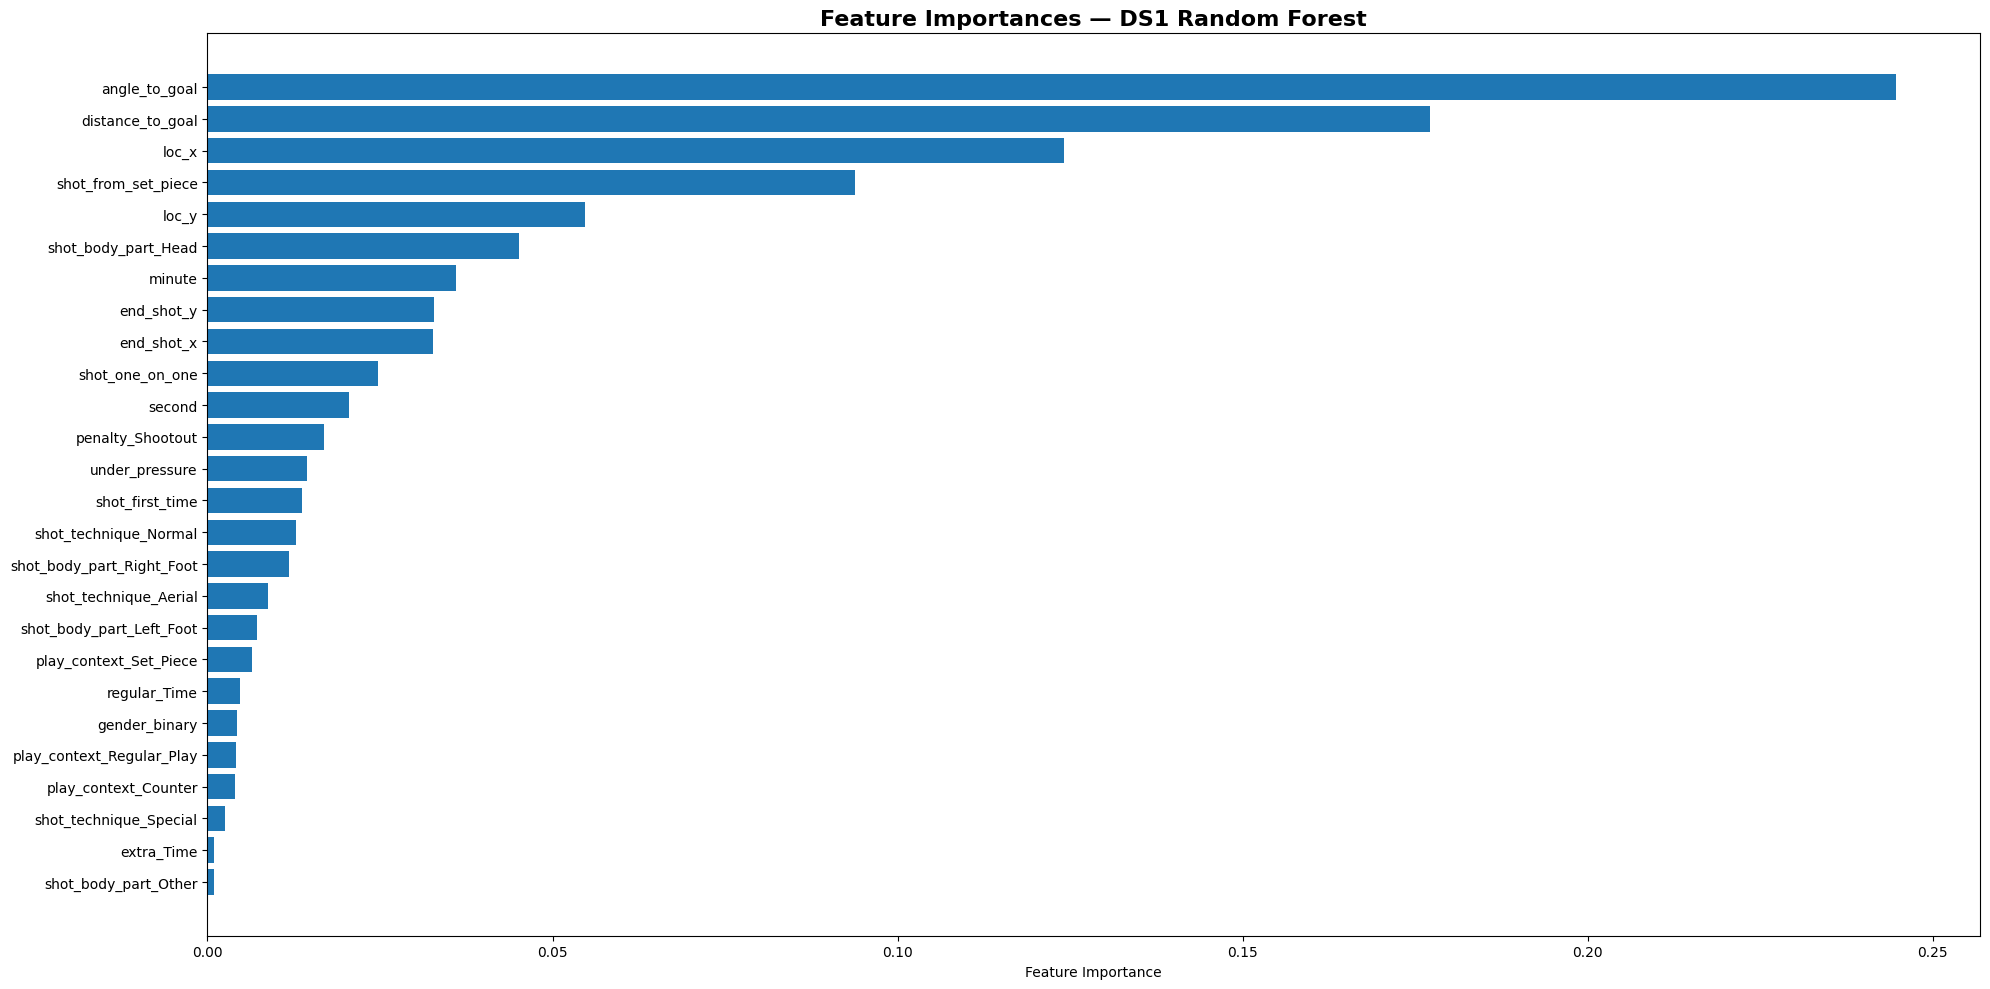

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Feature importances
importances = best_model_ds1.feature_importances_
features = X_ds1.columns
indices = np.argsort(importances)[::-1]

# Ranking
ranking = pd.DataFrame({
    "Feature": features[indices],
    "Importance": importances[indices]
})
pd.options.display.float_format = '{:.8f}'.format

print("\n Feature Importance Ranking:")
print(ranking.to_string(index=False))

# Plot of Feature Importances
plt.figure(figsize=(20, 10))
plt.barh(range(len(indices)), importances[indices][::-1], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices][::-1])
plt.xlabel("Feature Importance")
plt.title("Feature Importances — DS1 Random Forest", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


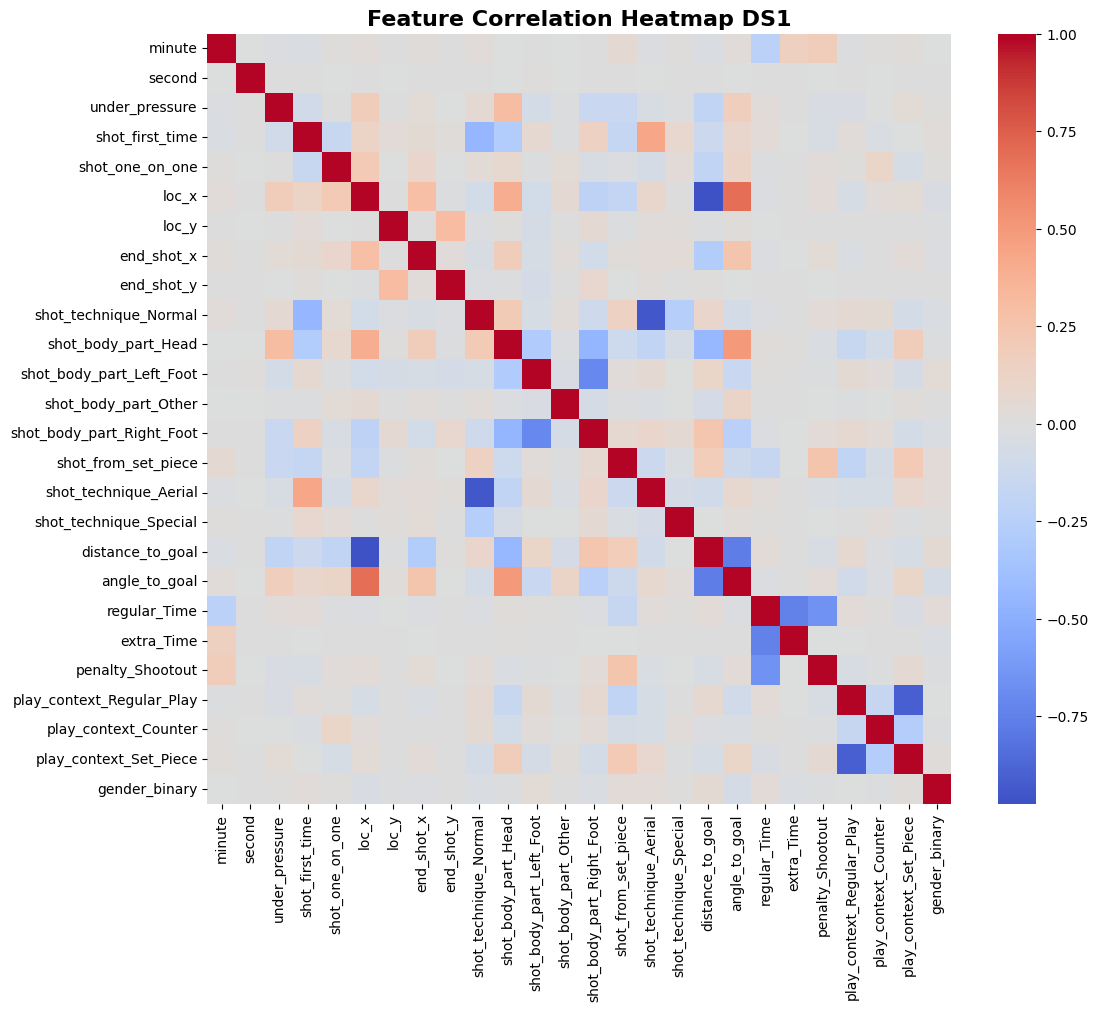

Strong correlations (>|0.25|):
loc_x                  angle_to_goal         0.68404558
angle_to_goal          shot_body_part_Head   0.49174978
shot_technique_Aerial  shot_first_time       0.43289613
shot_body_part_Head    loc_x                 0.39150466
loc_y                  end_shot_y            0.30833072
under_pressure         shot_body_part_Head   0.29863433
loc_x                  end_shot_x            0.28438964
dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is your DataFrame with the features
corr_matrix = X_ds1.corr()

# Correlation Heatmap 
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, cbar=True)
plt.title("Feature Correlation Heatmap DS1", fontsize=16, fontweight='bold')
plt.show()

# Take absolute values of correlations
corr_pairs = (
    corr_matrix
    .unstack() # flatten matrix
    .sort_values(ascending=False) # sort from strongest to weakest
)

# Remove duplicates and diagonal
corr_pairs = corr_pairs[
    (corr_pairs < 1.0)  # drop self-correlation
].drop_duplicates()

# Print only strong correlations (threshold can be adjusted)
print("Strong correlations (>|0.25|):")
print(corr_pairs[corr_pairs > 0.25])


## Dataset: DS2

### DS2 - Random Forest Regressor

In [39]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load dataset DS2
ds2 = pd.read_csv("../task1_xg/data/DS2_enriched.csv")

# Columns to drop (IDs and target)
columns_to_drop = [
    "event_id", "match_id", "team_id", 
    "player_id", "possession_team_id", "target_xg"
]

# Features (X) and Target (y)
X_ds2 = ds2.drop(columns=columns_to_drop)
y_ds2 = ds2["target_xg"]

print("Dataset DS2 loaded successfully")
print(f"Shape: {ds2.shape}")
print(f"Training Features: {X_ds2.shape[1]}")

Dataset DS2 loaded successfully
Shape: (88023, 39)
Training Features: 33


In [40]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    make_scorer
)
from sklearn.ensemble import RandomForestRegressor

# Train/Test Split (80/20) for DS2
X_train_ds2, X_test_ds2, y_train_ds2, y_test_ds2 = train_test_split(
    X_ds2, y_ds2, test_size=0.2, random_state=42
)

print(f"Training set size DS2: {X_train_ds2.shape}, Test set size DS2: {X_test_ds2.shape}")

# Hyperparameter Grid for Random Forest
param_grid_ds2 = {
    "n_estimators": [250, 500, 1000],
    "max_depth": [30, 40, 50],
    "max_features": ["sqrt", "log2"]
}

# Define scorer (negative RMSE, since sklearn maximizes)
rmse_scorer_ds2 = make_scorer(
    lambda yt, yp: -np.sqrt(mean_squared_error(yt, yp))
)

# GridSearchCV with 5-fold cross-validation
grid_search_ds2 = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid_ds2,
    cv=5,
    scoring=rmse_scorer_ds2,
    n_jobs=-1,
    verbose=1,
    refit=True
)

# Fit GridSearch
grid_search_ds2.fit(X_train_ds2, y_train_ds2)

print("Grid search completed for DS2")
print("Best Parameters:", grid_search_ds2.best_params_)


Training set size DS2: (70418, 33), Test set size DS2: (17605, 33)
Fitting 5 folds for each of 18 candidates, totalling 90 fits


ValueError: 
All the 90 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/manuelemustari/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/manuelemustari/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/manuelemustari/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py", line 363, in fit
    X, y = self._validate_data(
  File "/Users/manuelemustari/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/manuelemustari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
  File "/Users/manuelemustari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py", line 929, in check_array
    array = array.astype(new_dtype)
  File "/Users/manuelemustari/Library/Python/3.9/lib/python/site-packages/pandas/core/generic.py", line 6643, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/Users/manuelemustari/Library/Python/3.9/lib/python/site-packages/pandas/core/internals/managers.py", line 430, in astype
    return self.apply(
  File "/Users/manuelemustari/Library/Python/3.9/lib/python/site-packages/pandas/core/internals/managers.py", line 363, in apply
    applied = getattr(b, f)(**kwargs)
  File "/Users/manuelemustari/Library/Python/3.9/lib/python/site-packages/pandas/core/internals/blocks.py", line 758, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
  File "/Users/manuelemustari/Library/Python/3.9/lib/python/site-packages/pandas/core/dtypes/astype.py", line 237, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
  File "/Users/manuelemustari/Library/Python/3.9/lib/python/site-packages/pandas/core/dtypes/astype.py", line 182, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
  File "/Users/manuelemustari/Library/Python/3.9/lib/python/site-packages/pandas/core/dtypes/astype.py", line 133, in _astype_nansafe
    return arr.astype(dtype, copy=True)
ValueError: could not convert string to float: '650a2dc2-e5bb-4fac-9259-afbc03bdc322'

--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/manuelemustari/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/manuelemustari/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/manuelemustari/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py", line 363, in fit
    X, y = self._validate_data(
  File "/Users/manuelemustari/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/manuelemustari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
  File "/Users/manuelemustari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py", line 929, in check_array
    array = array.astype(new_dtype)
  File "/Users/manuelemustari/Library/Python/3.9/lib/python/site-packages/pandas/core/generic.py", line 6643, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/Users/manuelemustari/Library/Python/3.9/lib/python/site-packages/pandas/core/internals/managers.py", line 430, in astype
    return self.apply(
  File "/Users/manuelemustari/Library/Python/3.9/lib/python/site-packages/pandas/core/internals/managers.py", line 363, in apply
    applied = getattr(b, f)(**kwargs)
  File "/Users/manuelemustari/Library/Python/3.9/lib/python/site-packages/pandas/core/internals/blocks.py", line 758, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
  File "/Users/manuelemustari/Library/Python/3.9/lib/python/site-packages/pandas/core/dtypes/astype.py", line 237, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
  File "/Users/manuelemustari/Library/Python/3.9/lib/python/site-packages/pandas/core/dtypes/astype.py", line 182, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
  File "/Users/manuelemustari/Library/Python/3.9/lib/python/site-packages/pandas/core/dtypes/astype.py", line 133, in _astype_nansafe
    return arr.astype(dtype, copy=True)
ValueError: could not convert string to float: 'f3840961-c114-402a-b0e3-4d8b83c8c96b'


In [ ]:
# Complete results of cross-validation
df_results_ds2 = pd.DataFrame(grid_search_ds2.cv_results_)

# Show the most important columns
results_table_ds2 = df_results_ds2[[
    "param_n_estimators", "param_max_depth", "param_max_features",
    "mean_test_score", "std_test_score", "rank_test_score"
]].copy()

# Convert RMSE from negative to positive
results_table_ds2["mean_test_RMSE"] = -results_table_ds2["mean_test_score"]
results_table_ds2["std_test_RMSE"] = results_table_ds2["std_test_score"]

# Drop old columns and sort by rank
results_table_ds2 = results_table_ds2.drop(columns=["mean_test_score", "std_test_score"])
results_table_ds2 = results_table_ds2.sort_values("rank_test_score")

print("GridSearchCV results for DS2 (best combinations on top):")
display(results_table_ds2)

print("\nBest parameters from CV (DS2):")
print(grid_search_ds2.best_params_)
print(f"Best CV RMSE (DS2): {-grid_search_ds2.best_score_:.6f}")


In [ ]:
# Test set Evaluation (DS2)
best_model_ds2 = grid_search_ds2.best_estimator_
y_pred_ds2 = best_model_ds2.predict(X_test_ds2)

# Metrics

# RMSE (Root Mean Squared Error)
# - Measures the average magnitude of the errors between predicted and actual values
# - Formula: RMSE = sqrt(mean_squared_error(y_true, y_pred))
# - The lower the RMSE, the better the model's performance
rmse_test = np.sqrt(mean_squared_error(y_test_ds2, y_pred_ds2))

# MAE (Mean Absolute Error)
# - Measures the average magnitude of the errors between predicted and actual values
# - Formula: MAE = mean_absolute_error(y_true, y_pred)
# - The lower the MAE, the better the model's performance
mae_test = mean_absolute_error(y_test_ds2, y_pred_ds2)

# R² (Coefficient of Determination)
# - Measures the proportion of the variance in the dependent variable that is predictable from the independent variables
# - Formula: R² = 1 - (SS_res / SS_tot)
#   where SS_res is the sum of squares of residuals and SS_tot is the total sum of squares
# - The higher the R², the better the model's performance
r2_test = r2_score(y_test_ds2, y_pred_ds2)

# Adjusted R² 
# - Adjusts R² to account for the number of predictors in the model
# - Formula: Adjusted R² = 1 - (1 - R²) * (n - 1) / (n - p - 1)
# - The higher the Adjusted R², the better the model's performance
n_ds2 = len(y_test_ds2)
p_ds2 = X_test_ds2.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n_ds2 - 1) / (n_ds2 - p_ds2 - 1)

# Create a DataFrame to display the metrics
metrics_df_ds2 = pd.DataFrame({
    "Metric": ["RMSE", "MAE", "R²", "Adjusted R²"],
    "Value": [rmse_test, mae_test, r2_test, adjusted_r2_test]
}).round(6)

print("Final Test Set Results (DS2):")
display(metrics_df_ds2)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Feature importances
importances = best_model_ds2.feature_importances_
features = X_ds2.columns
indices = np.argsort(importances)[::-1]

# Ranking
ranking = pd.DataFrame({
    "Feature": features[indices],
    "Importance": importances[indices]
})
pd.options.display.float_format = '{:.8f}'.format

print("\n Feature Importance Ranking:")
print(ranking.to_string(index=False))

# Plot of Feature Importances
plt.figure(figsize=(20, 10))
plt.barh(range(len(indices)), importances[indices][::-1], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices][::-1])
plt.xlabel("Feature Importance")
plt.title("Feature Importances — DS1 Random Forest", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is your DataFrame with the features
corr_matrix = X_ds2.corr()

# Correlation Heatmap 
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, cbar=True)
plt.title("Feature Correlation Heatmap DS1", fontsize=16, fontweight='bold')
plt.show()

# Take absolute values of correlations
corr_pairs = (
    corr_matrix
    .unstack() # flatten matrix
    .sort_values(ascending=False) # sort from strongest to weakest
)

# Remove duplicates and diagonal
corr_pairs = corr_pairs[
    (corr_pairs < 1.0)  # drop self-correlation
].drop_duplicates()

# Print only strong correlations (threshold can be adjusted)
print("Strong correlations (>|0.25|):")
print(corr_pairs[corr_pairs > 0.25])
